In [1]:
import tensorflow as tf
import numpy as np

In [2]:
n_features = 10
n_neurons = 3

In [3]:
x = tf.placeholder(tf.float32, (None, n_features))

In [4]:
w = tf.Variable(tf.random_normal([n_features, n_neurons]))
b = tf.Variable(tf.ones([n_neurons]))

In [5]:
xW = tf.matmul(x, w)

In [6]:
z = tf.add(xW, b)

In [7]:
a = tf.sigmoid(z)

In [8]:
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [10]:
print(layer_out)

[[0.4314672 0.8434948 0.7642867]]


## Simple Linear Regression

In [11]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5,1.5,10)

In [12]:
x_data

array([-5.81838941e-03,  2.03235843e+00,  1.92610433e+00,  3.90660625e+00,
        5.82510663e+00,  4.64473023e+00,  7.23950099e+00,  8.53685519e+00,
        9.39537662e+00,  9.49807872e+00])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

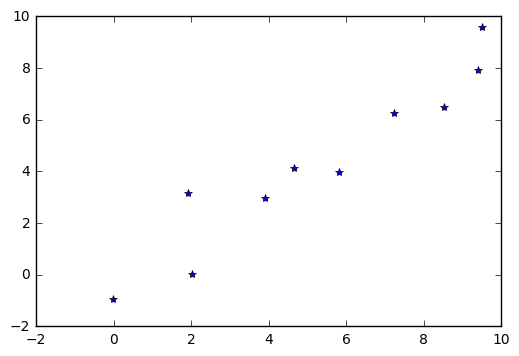

In [15]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [16]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [17]:
error = 0 

for x, y in zip(x_data, y_label):
    
    y_hat = m * x + b

    error += (y-y_hat)**2

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])    

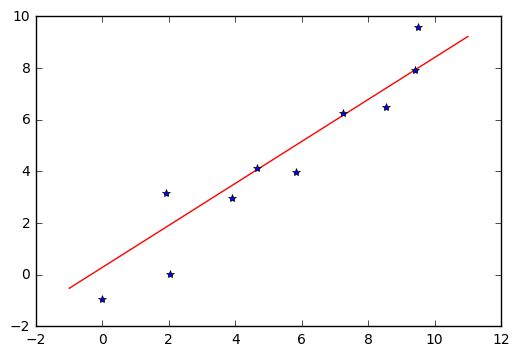

In [21]:
x_test = np.linspace(-1,11,10)

#y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')